## Algoritmo KNN

El algoritmo KNN (K Nearest Neighbors) trata de buscar los K puntos más cercanos a un punto concreto para poder inferir su valor.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

### Ejemplo

Imaginemos que seleccionamos 5 personas aleatorias y apuntamos su altura, peso y género (Hombre o mujer). Apuntamos sus datos en una libreta que tengamos a mano (o notebook) y los analizamos (creamos un DataFrame):

In [4]:
data = {'Masa': [50, 80, 90, 45, 60],
        'Altura': [1.48, 1.82, 1.85, 1.55, 1.60],
        'Genero': ['m', 'h', 'h', 'm', 'm']}

df = pd.DataFrame(data)

Ahora, veamos los datos de la mejor forma posible, con un gráfico de dispersión:

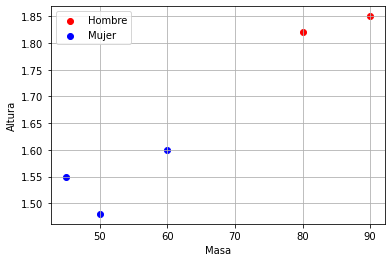

In [7]:
ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Masa'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")
ax.scatter(df.loc[df['Genero'] == 'm', 'Masa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")

plt.xlabel("Masa")
plt.ylabel("Altura")
ax.legend()
plt.grid()
plt.show()

Si nos dieran datos de una sexta persona, pero no nos dieran su género, ¿Podríamos adivinarlo de alguna forma? Pintemos los datos:

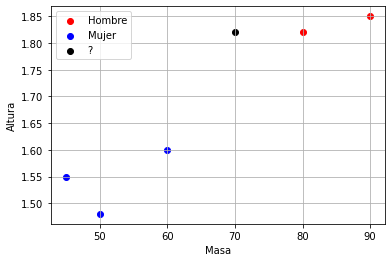

In [11]:
punto_nuevo = {'Masa': [70],
               'Altura': [1.82]}


punto_nuevo = pd.DataFrame(punto_nuevo)

ax = plt.axes()

ax.scatter(df.loc[df['Genero'] == 'h', 'Masa'],
           df.loc[df['Genero'] == 'h', 'Altura'],
           c="red",
           label="Hombre")

ax.scatter(df.loc[df['Genero'] == 'm', 'Masa'],
           df.loc[df['Genero'] == 'm', 'Altura'],
           c="blue",
           label="Mujer")

ax.scatter(punto_nuevo['Masa'],
           punto_nuevo['Altura'],
           c="black",
          label='?')
plt.xlabel("Masa")
plt.ylabel("Altura")
ax.legend()
plt.grid()

Dirías que es 'Hombre', ¿verdad? ¿Cómo lo has racionado?

Si tu pensamiento es como el de la mayoría, habrás hecho (aunque sea de manera inconsciente) la diferencia entre ambos grupos. Al estar más cerca del grupo formado por los puntos que sabemos que son 'Hombres', decidimos que es 'Hombre'. Pues esto es lo que hace el algoritmo KNN, calcula la distancia de los puntos entre sí y decide a qué grupo pertenece, solo que en vez de utilizar todos los datos posibles, utiliza los K vecinos más próximos.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
X = df[['Masa', 'Altura']]
y = df[['Genero']]

knn.fit(X, y)

print(y.shape)

prediccion = knn.predict(punto_nuevo)
print(prediccion)

(5, 1)
['h']


<ipython-input-12-391d239f7791>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X, y)


Si quieres más información, puedes verlo en [documentación](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification).


### EJERCICIO

Vamos a practicar un poco más. Lee el dataset de Anuncios en redes sociales y crea un modelo de predicción con los diferentes algortimos que hemos visto, sabiendo que nuestro objetivo será predecir si el usuario compra (``Purchased = 1``) o no.

1. ¿Se trata de un problema de regresión o de clasificación?
2. Adapta todas las variables que tengan que se adaptadas.
3. Divide el dataset en train y test, con un 30% de datos para test, y utilizando una semilla = 42.
3. Prueba el modelo lineal que hemos visto para ese tipo de problemas (LinearRegression o LogisticRegression)
4. Ahora, utiliza el modelo acorde basado en árboles de decisión
5. Finalmente, utiliza el modelo que acabamos de estudiar y compara los resultados


In [82]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


6. Imagina que en lugar de los datos que hemos visto, nos dieran los datos sin la edad. Elimina las variables 'Age' y 'User ID', y vuelve a probar los modelos, ¿cuál es el mejor algoritmo ahora?

7. ¿Y si las columnas que tuviera fueran 'Gender' y 'Age', que parece que serán las más fáciles de conseguir en un entorno real?

Finalmente, también podríamos crearnos un iterador para encontrar la mejor K: